### Custom
Now that you’ve found the answers to the questions above, design two of your own questions to answer. These should be sufficiently difficult, and you should be creative! You should start with a question, and then propose a predicted answer or hypothesis before writing a MapReduce job to answer it.

[0.5 pt] Describe the dataset

#### Answer : This is an Open Payment dataset for in medicine. The dataset contains details like Hospital Details, Physician Details, Manufactures of Medicine, Payment Details, All the prescribed medicine details, etc

[0.5 pt] Outline the types of insights you hope to gain from it 
#### Answer : We are trying to get insight in the how much revenue is generated by medicines and drugs sold by different cities, physicians and hospitals. The data can also give us insight in the type of physician generating most revenue and subsequently predicting how much each a type of physician will earn in a city.

[1 pt] Make hypotheses about what you might find
#### Answer : Our hypothesis would be that a city hospital would make most dollars from medicines. The physician type Mdeical Doctors would make most money.

[4 pt] Design at least 3 “questions” (along the lines of those above) and answer them. Remember that presentation matters here. ML Models are a good choice for some of the datasets; you can describe what you’ll try to predict or classify and outline your experiences with various models.
#### Answer : 1. The city that sells maximum medicine. 
#### 2. The Hospital that generates maximum revenue
#### 3. The Physician Type that generates most revenue
#### 4. Predicting the revenue for the year 2017 based on city and physician type.

#### Loading dataset

In [2]:
# from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import from_json, col
conf = SparkConf().setAppName('FirstSpark2').setMaster('Spark')
sc = SparkContext.getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
df = sqlContext.read.csv("openPayments/")

print(type(df))
print(df.count())
df.show(1)

<class 'pyspark.sql.dataframe.DataFrame'>
10931855
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------+---------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------+---------------+-----------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+--

In [67]:
df = df.filter(~df._c30.rlike("Total"))

#### Checking Recipient city to total dollars from max

In [3]:
df2 = df.groupBy(df._c12)
# groupedBysubreddit = groupedBysubreddit.agg({'count':'avg'})
df2 = df2.agg({'_c30':'sum'})
# print(df2.count())
# print(df2.printSchema)
# df2.show(1)

df3 = df2.orderBy('sum(_c30)', ascending=False)
print(df3.count())
print(df3.printSchema)
df3.show()

20724
<bound method DataFrame.printSchema of DataFrame[_c12: string, sum(_c30): double]>
+-------------+--------------------+
|         _c12|           sum(_c30)|
+-------------+--------------------+
|       DUARTE|4.0168693352000004E8|
|       BOSTON|      1.0209203657E8|
|     NEW YORK| 7.075628224000004E7|
|  LOS ANGELES| 5.362649237000001E7|
|  SAN ANTONIO| 3.526252055000001E7|
|      HOUSTON|3.5087647880000025E7|
| PHILADELPHIA| 3.424064474999999E7|
|        Phila|3.3113761450000007E7|
|    Baltimore| 3.020595239000001E7|
|      CHICAGO|2.9757669319999997E7|
|       DALLAS|       2.617206779E7|
|      ATLANTA| 2.616071866999999E7|
|  ALBUQUERQUE| 2.567419055000002E7|
|    CLEVELAND| 2.351289891000001E7|
|    ROCHESTER|2.2142900710000012E7|
|     New York|2.0818279729999997E7|
|SAN FRANCISCO|1.9932431819999997E7|
|  KANSAS CITY|1.9456468719999995E7|
|    BALTIMORE|1.9281790049999993E7|
|       Boston|1.9231705200000003E7|
+-------------+--------------------+
only showing top 20 row

#### Plotting the result on Bar graph

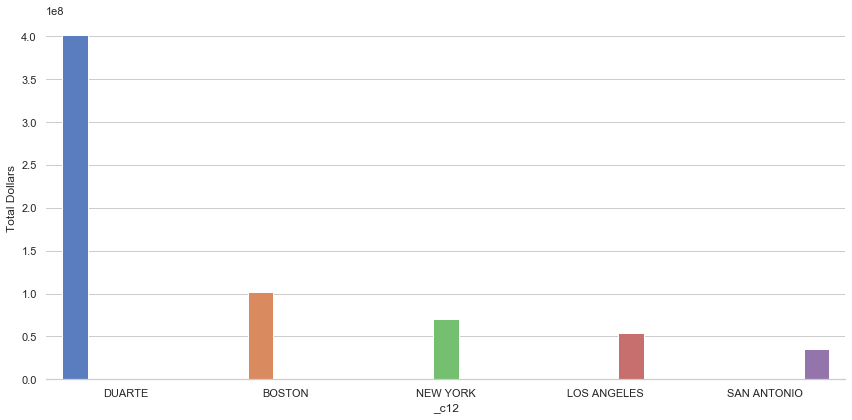

In [43]:
import seaborn as sns
sns.set(style="whitegrid")
# Load the example Titanic dataset
comp = df3.limit(5)
comp_P = comp.toPandas()
# Draw a nested barplot to show survival for avg(sentiment) and subreddit
g = sns.catplot(x="_c12", y="sum(_c30)", hue="_c12", data=comp_P, height=6, aspect=2, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Dollars")

#### > We find that a city named Durate is blowing other cities out of water in terms of total value of Dollars

#### Checking Recepient city to number of Payments

In [ ]:
df2 = df.groupBy(df._c12)
# groupedBysubreddit = groupedBysubreddit.agg({'count':'avg'})
df_numPay = df2.agg({'_c32':'sum'})
# print(df2.count())
# print(df2.printSchema)
# df2.show(1)

df_numPay = df_numPay.orderBy('sum(_c32)', ascending=False)
print(df_numPay.count())
print(df_numPay.printSchema)
df_numPay.show()

#### Grouping by the physician to the dollars earned

In [10]:
from pyspark.sql import functions as F

df = df.withColumn('FullName', 
                    F.concat(F.col('_c6'),F.lit('_'),F.col('_c8')))
df2 = df.groupBy(df.FullName)
df_numPay = df2.agg({'_c30':'sum'})

df_numPay = df_numPay.orderBy('sum(_c30)', ascending=False)
print(df_numPay.count())
print(df_numPay.printSchema)
df_numPay.show()

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------+---------------+------------------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------+---------------+-----------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+----------

#### Plotting Bar Graph: This graph shows the Top 5 Most Earning Doctors

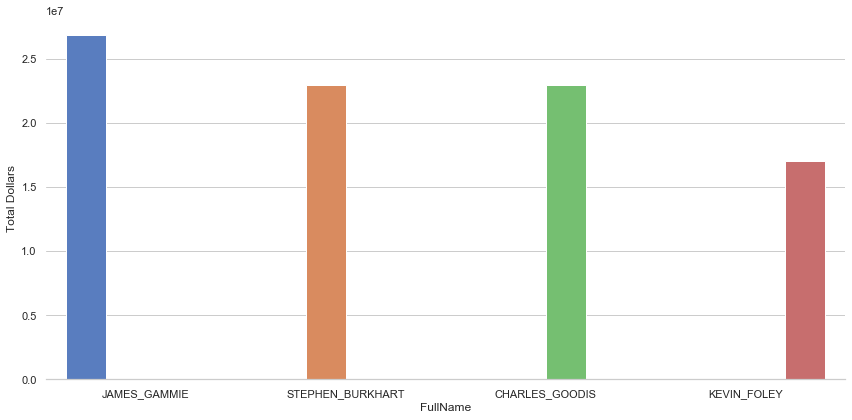

In [11]:
import seaborn as sns
sns.set(style="whitegrid")
# Load the example Titanic dataset
comp = df_numPay.limit(5)
comp_P = comp.toPandas()
# Draw a nested barplot to show survival for avg(sentiment) and subreddit
g = sns.catplot(x="FullName", y="sum(_c30)", hue="FullName", data=comp_P, height=6, aspect=2, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Dollars")

### Now let us find out more about Durate

#### Let us check if there are any teaching shools listed in payments, and if so how much they get

In [55]:
df2 = df.filter(df._c12.like("DUARTE")).groupBy("_c4")
df3 = df2.agg({'_c30':'sum'})
df3.show(5, False)

+---------------------------------+--------------+
|_c4                              |sum(_c30)     |
+---------------------------------+--------------+
|null                             |897858.41     |
|CITY OF HOPE NATIONAL MEDICAL CNT|4.0078907511E8|
+---------------------------------+--------------+



#### So, we find that Duarte has only Teaching hospital - CITY OF HOPE NATIONAL MEDICAL CNT and it gets almost all the spend in the city
#### > CITY OF HOPE NATIONAL MEDICAL CNT  gets payments many times more than Boston(2nd in payments)



### Can we predict payments for year 2017, based on Recipient_City, Physician_Primary_Type

#### selecting required column

In [110]:
from pyspark.sql.functions import avg

df2 = df.select('_c12', '_c18', "_c30").where(df._c30>0).groupBy('_c12', '_c18')
# df3 = df2.agg({'_c30':'avg'}).alias("avg_c30").orderBy('avg(_c30)', ascending=False)
df3 = df2.agg(avg('_c30').alias("avgDollars")).orderBy('avgDollars', ascending=False)
df3.show(10, False)

+----------+--------------------+------------------+
|_c12      |_c18                |avgDollars        |
+----------+--------------------+------------------+
|DUARTE    |null                |1781284.7782666667|
|CARNATION |Medical Doctor      |584406.37         |
|Hackensack|null                |251518.23116666666|
|BANDON    |Doctor of Optometry |197076.88         |
|KENNEWICK |null                |175250.465        |
|COQUILLE  |Doctor of Optometry |169844.515        |
|Sherborn  |Medical Doctor      |142383.09666666665|
|HAZARD    |null                |122743.55333333333|
|Fort Bliss|Doctor of Dentistry |101259.83         |
|Mahtomedi |Doctor of Osteopathy|84000.0           |
+----------+--------------------+------------------+
only showing top 10 rows



#### Viewing data on graph, where Physician_Primary_Type is not null

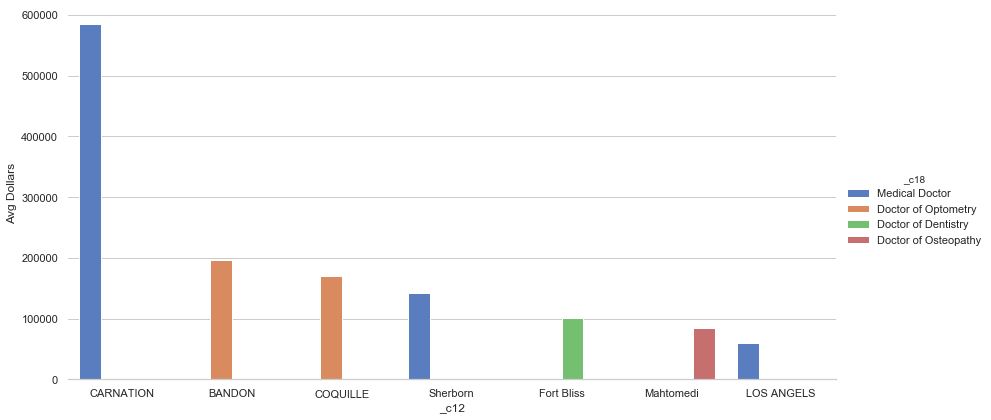

In [111]:
import seaborn as sns
sns.set(style="whitegrid")

comp = df3.filter(df3._c18.isNotNull()).limit(7)
comp_P = comp.toPandas()
# Draw a nested barplot to show survival for avg(sentiment) and subreddit
g = sns.catplot(x="_c12", y="avgDollars", hue="_c18", data=comp_P, height=6, aspect=2, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Avg Dollars")

#### > Medical doctors in CARNATION earn a lot more as compared to other doctors

#### How is distribution of dollars in Physician_Primary_type in city of DUARTE

In [113]:
df4 = df3.where(df3._c12.like("DUARTE")).orderBy('avgDollars', ascending=False)
df4.show()

+------+--------------------+------------------+
|  _c12|                _c18|        avgDollars|
+------+--------------------+------------------+
|DUARTE|                null|1781284.7782666667|
|DUARTE|      Medical Doctor| 626.9705734265735|
|DUARTE| Doctor of Optometry| 54.45272727272727|
|DUARTE| Doctor of Dentistry|          49.19375|
|DUARTE|Doctor of Osteopathy|37.245000000000005|
+------+--------------------+------------------+



In [1]:
df2 = df.groupBy(df._c12)
df2.show()

NameError: name 'df' is not defined

#### > DUARTE medical professionals dont like to categorize themselves.

#### predicting Total dollars for a person, give city and Physicaian Primary type

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(df4._c12)

In [122]:
melbourne_data = df3.toPandas()
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)

print(melbourne_data.head(5))
# Choose target and features
y = melbourne_data.avgDollars
melbourne_features = ['_c12', '_c18']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

         _c12                 _c18     avgDollars
1   CARNATION       Medical Doctor  584406.370000
3      BANDON  Doctor of Optometry  197076.880000
5    COQUILLE  Doctor of Optometry  169844.515000
6    Sherborn       Medical Doctor  142383.096667
8  Fort Bliss  Doctor of Dentistry  101259.830000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))